# PCA

We're trying to measure different dimensionality reduction algorithms and how well they reduce the dimensions without loosing too much information. We want to see if they can result in higher performance (by filtering out noise and unnecessary details) or merely speed up training.

## 1. Configuration
### 1.1. Import Libraries

In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib as matplot
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy


print("Python ver: {}".format(sys.version))
print("Numpy ver: {}".format(np.__version__))
print("Pandas ver: {}".format(pd.__version__))
print("MatPlotLib ver: {}".format(matplot.__version__))
print("SeaBorn ver: {}".format(sns.__version__))
print("StatsModel ver: {}".format(sm.__version__))
print("Scipy ver: {}".format(scipy.__version__))
print("SkLearn ver: {}".format(sklearn.__version__))

Python ver: 3.9.2 (default, Feb 24 2021, 13:26:09) 
[Clang 12.0.0 (clang-1200.0.32.29)]
Numpy ver: 1.19.5
Pandas ver: 1.1.4
MatPlotLib ver: 3.3.3
SeaBorn ver: 0.11.1
StatsModel ver: 0.12.1
Scipy ver: 1.5.4
SkLearn ver: 0.24.1


In [2]:
import warnings

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Disable warnings
warnings.simplefilter("ignore")

## 2. Data Preparation

### 2.1 Load the data

In [3]:
try:
    data = pd.read_csv('../../datasets/AimoScoreWeakLinks.csv')
    data = data.drop(columns=['Unnamed: 0', 'AimoScore'])
except IOError as e:
    print(e)

## 3. Standardize the Data
Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales (i.e PCA is very sensitive to scales). 

In [4]:
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

X = StandardScaler().fit_transform(X)

## 4. PCA Projection (2 predictors)
### 4.1. Create a 2D projection

In [5]:
print(X.shape)

(2085, 30)


Our datasets has 30 predictors and we want to reduce it to 2 predictors

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [7]:
principalDataFrame = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDataFrame = pd.concat([principalDataFrame, y], axis = 1)

finalDataFrame

,principal component 1,principal component 2,WeakLinks
0,0.455595,0.923797,RightShoulderElevation
1,0.340160,-3.006339,RightArmFallForward
2,-1.264388,-0.826700,LeftArmFallForward
3,1.870636,2.444827,RightShoulderElevation
4,-2.190337,2.021991,ForwardHead
...,...,...,...
2080,-0.288852,0.355991,RightArmFallForward
2081,-3.582804,1.830659,LeftArmFallForward
2082,0.947273,2.615204,LeftArmFallForward
2083,0.449845,-4.333865,RightKneeMovesOutward


### 4.2 Visualize 2D Projection

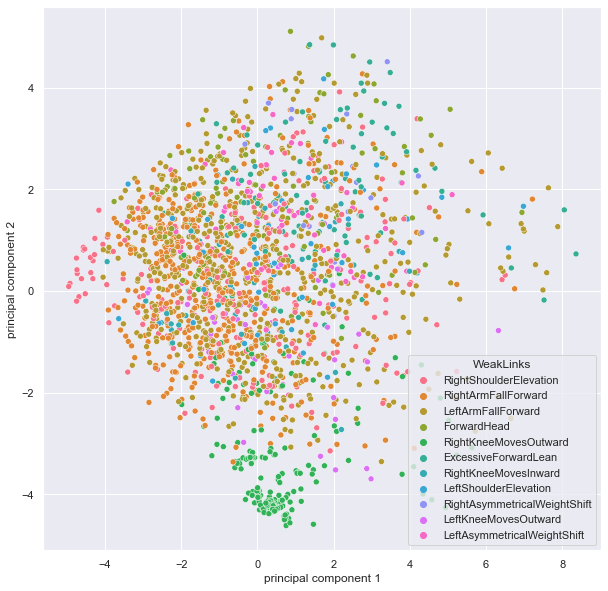

In [50]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(data=finalDataFrame, x="principal component 1", y="principal component 2", hue="WeakLinks")
plt.show()

### 4.3. Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components. Together, the first two principal components contain 27.93% of the information. The first principal component contains 14.51% of the variance and the second principal component contains 13.42% of the variance.

In [9]:
ev = pca.explained_variance_ratio_

print(ev)
print('\n')
print(np.sum(ev))

[0.14507121 0.13423252]


0.27930372835057793


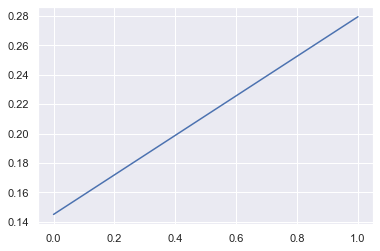

In [80]:
plt.plot(np.cumsum(ev))
plt.show()

### 4.4 Reverse transformation and measure the reconstruction error

One way to measure how well the algorithm has eliminated dimensions without loosing too much information is by measuring the reconstruction error.

In [58]:
principalComponents_preimage = pca.inverse_transform(principalComponents)

In [61]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, principalComponents_preimage)

0.7206962716494217

## 5. PCA Projection (3 predictors)

### 5.1. Create a 3D projection

In [36]:
pca3D = PCA(n_components=3)

X_pca3D = pca3D.fit_transform(X)

In [37]:
pca3D_df = pd.DataFrame(data = X_pca3D
             , columns = ['PC1', 'PC2', 'PC3'])

df_3D = pd.concat([pca3D_df, y], axis = 1)

df_3D

,PC1,PC2,PC3,WeakLinks
0,0.456237,0.924875,-0.159081,RightShoulderElevation
1,0.341317,-3.005373,2.184147,RightArmFallForward
2,-1.264191,-0.827506,0.418734,LeftArmFallForward
3,1.870165,2.444793,-3.256853,RightShoulderElevation
4,-2.189623,2.022268,-0.590197,ForwardHead
...,...,...,...,...
2080,-0.288170,0.355635,0.949744,RightArmFallForward
2081,-3.582580,1.831243,0.381624,LeftArmFallForward
2082,0.948691,2.615856,-3.578367,LeftArmFallForward
2083,0.448973,-4.333795,-2.701184,RightKneeMovesOutward


### 5.2 Visualize 3D Projection

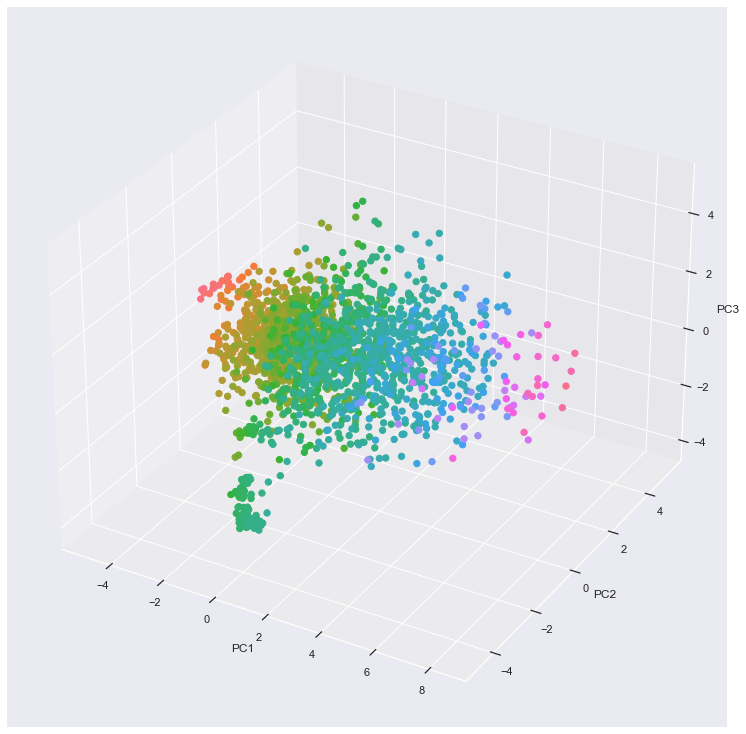

In [49]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(df_3D['PC1'], df_3D['PC2'], df_3D['PC3'], s=40, c=df_3D['PC1'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.savefig("scatter_hue", bbox_inches='tight')

### 5.3 Explained Variance

Together, the three principal components contain 35.31% of the information. The first principal component contains 14.51% of the variance, the second principal component contains 13.42% of the variance, and the third contains 7.38%.

In [39]:
print(pca3D.explained_variance_ratio_)
print('\n')
print(np.sum(pca3D.explained_variance_ratio_))

[0.14507119 0.13423251 0.07384339]


0.35314708203503914


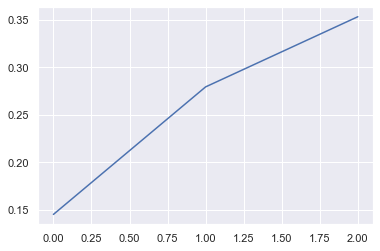

In [92]:
plt.plot(np.cumsum(pca3D.explained_variance_ratio_))
plt.show()

### 5.4 Reverse transformation and measure the reconstruction error

In [63]:
X_pca3D_preimage = pca3D.inverse_transform(X_pca3D)

mean_squared_error(X, X_pca3D_preimage)

0.6468529179649607

## 6. Dimensions that add up to 95% of the variance

### 6.1. Create a projection

In [55]:
pca95 = PCA(n_components=0.95)
X_reduced = pca95.fit_transform(X)

### 6.2 Explained variance 

The 26 first principal components add up to 95% of the variance and together, these principal components contain 96.16% of the information.

In [57]:
print(len(pca95.explained_variance_ratio_))
print('\n')
print(pca95.explained_variance_ratio_)
print('\n')
print(np.sum(pca95.explained_variance_ratio_))

26


[0.14507121 0.13423252 0.07384452 0.06302841 0.055408   0.04761757
 0.04108961 0.03603008 0.03526132 0.03109951 0.03012121 0.02689688
 0.02578684 0.02449826 0.0208956  0.01959196 0.01877333 0.01842148
 0.01717912 0.01621718 0.01517316 0.01460496 0.01341918 0.01327065
 0.0122683  0.01177703]


0.9615779032453361


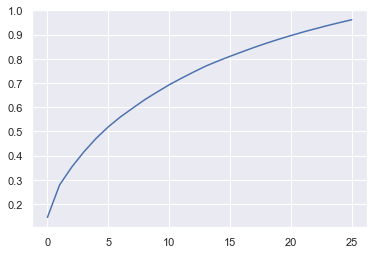

In [98]:
plt.plot(np.cumsum(pca95.explained_variance_ratio_))
plt.show()

### 6.3 Reverse transformation and measure the reconstruction error

In [99]:
X_reduced_preimage = pca95.inverse_transform(X_reduced)

mean_squared_error(X, X_reduced_preimage)

0.03842209675466393

## 7. Kernel PCA

Kernel PCA makes it possible to perform nonlinear projections for dimensionality reduction. 

### 7.1. Create a 2D projection

In [102]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', fit_inverse_transform=True)
kPCA = rbf_pca.fit_transform(X)

In [103]:
kPCA_df = pd.DataFrame(data = kPCA
             , columns = ['PC1', 'PC2'])

df = pd.concat([kPCA_df, y], axis = 1)

df

,PC1,PC2,WeakLinks
0,-0.062832,0.111564,RightShoulderElevation
1,0.164415,-0.016578,RightArmFallForward
2,-0.019693,-0.151645,LeftArmFallForward
3,-0.045219,0.338298,RightShoulderElevation
4,-0.350307,-0.210186,ForwardHead
...,...,...,...
2080,-0.076096,0.004028,RightArmFallForward
2081,-0.402947,-0.362512,LeftArmFallForward
2082,-0.069740,0.238806,LeftArmFallForward
2083,0.703390,-0.198966,RightKneeMovesOutward


### 7.2 Visualize 2D Projection of Kernel PCA

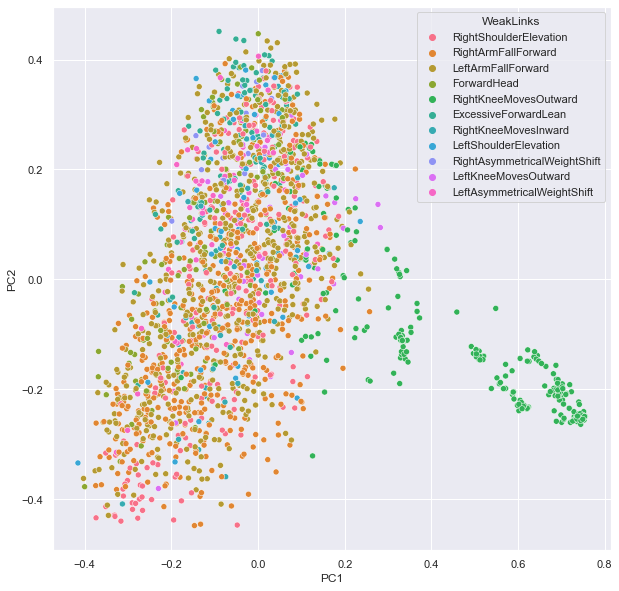

In [104]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="WeakLinks")
plt.show()

In [105]:
kPCA_preimage = rbf_pca.inverse_transform(kPCA)

mean_squared_error(X, kPCA_preimage)

7.391910425567535e-28